img_array.shape: (417, 665, 4)
[[240, 141, 255, 1], [225, 149, 255, 1], [212, 156, 255, 1], [199, 163, 255, 1], [188, 169, 255, 1]]
[[240, 141], [225, 149], [212, 156], [199, 163], [188, 169]]
total points number is:230


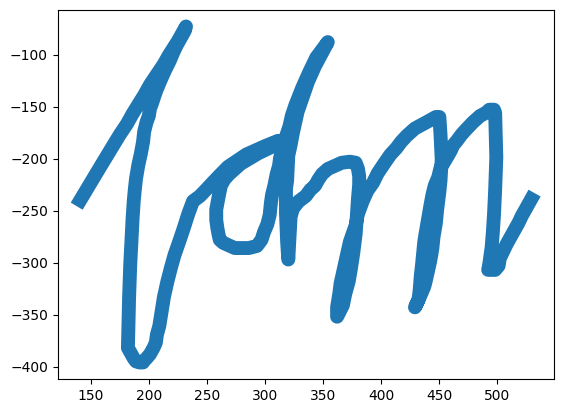

len(basis)229
[[12,-22],[10,-19],[10,-19],[9,-16],[9,-16],[9,-15],[7,-15],[7,-13],[7,-13],[7,-15],[9,-15],[9,-15],[6,-12],[6,-10],[6,-10],[4,-9],[6,-12],[-1,6],[-10,21],[-4,10],[-4,12],[-6,13],[-6,15],[-4,12],[-3,9],[-3,10],[-3,9],[-1,10],[-3,9],[-3,13],[-1,15],[-3,18],[-3,15],[-3,19],[-1,15],[-1,18],[-1,25],[-1,33],[-1,33],[-1,48],[-1,72],[4,9],[3,6],[3,4],[4,1],[4,0],[1,-3],[3,-3],[4,-6],[4,-9],[3,-7],[1,-12],[3,-12],[3,-21],[3,-21],[4,-22],[4,-19],[4,-18],[7,-24],[4,-15],[6,-21],[6,-18],[9,-7],[9,-10],[7,-9],[9,-10],[10,-12],[24,-18],[24,-12],[16,-7],[13,0],[1,-1],[-21,9],[-19,10],[-22,15],[-15,15],[-6,7],[-4,9],[-3,16],[-3,18],[0,15],[1,12],[1,9],[1,7],[4,4],[6,3],[9,4],[18,0],[10,-3],[6,-9],[3,-10],[4,-12],[3,-13],[1,-16],[1,-12],[3,-13],[3,-16],[3,-12],[1,-12],[3,-12],[4,-18],[4,-15],[3,-15],[4,-15],[9,-25],[9,-22],[9,-21],[15,-22],[-16,34],[-9,22],[-7,24],[-6,19],[-3,15],[-3,15],[-3,18],[-3,15],[-1,36],[-1,12],[0,34],[1,42],[1,25],[1,-31],[1,-30],[3,-12],[7,-10],[9,-7],[6,-9],[6

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def get_img_array(name="ldm_v2.png"):
    path = f"./imgs/{name}"
    img = Image.open(path)
    img_array = np.array(img)
    
    # 将img_array 里面的点存储到points中
    h, w, c = img_array.shape
    print(f"img_array.shape: {img_array.shape}")
    return img_array
    
def get_points(img_array):
    h, w, c = img_array.shape
    points =[]
    # 读取有颜色的坐标存储到 points 中
    for i in range(h):
        for j in range(w):
            point = img_array[i][j]
            if point[2]==0:
                points.append([i,j])

    
    # 删除多余的坐标，一个点只用一个坐标表示
    # 删除的原理是坐标 A 和 坐标 B 的距离平方小于等于8认为是同一个点
    points.sort(key=lambda x:x[0])
    pts = []
    for point in points:
        if len(pts)==0 or (point[0]-pts[-1][0])**2+(point[1]-pts[-1][1])**2>8:
            pts.append(point[::1])
    points = pts
    
    points.sort(key=lambda x:x[1])
    pts = []
    for point in points:
        if len(pts)==0 or (point[0]-pts[-1][0])**2+(point[1]-pts[-1][1])**2>8:
            pts.append(point[::1])
    points = pts

    
    # 将颜色信息添加到points中
    for i in range(len(points)):
        x, y = points[i]
        points[i].append(img_array[x][y][0])
        points[i].append(1 if img_array[x][y][1]==5 else -1)
    
    # print(points[:10])
    # 对points进行排序，按照比划顺序
    points = sorted(points, key=lambda p: -1000*p[2]+p[1]*p[3])
    print(points[:5])
    
    # 删除颜色信息
    points = [p[:2] for p in points]
    print(points[:5])
    
    print(f"total points number is:{len(points)}")
    return points

## 1.5 为放大倍数
def get_moves(points, w=1.5):
    basis = []
    for i in range(1, len(points)):
        x_, y_ = points[i][0]-points[i-1][0], points[i][1]-points[i-1][1]
        basis.append([int(x_*w), int(y_*w)])
    print(f"len(basis){len(basis)}")
    s = "["
    for bas in basis:
        s += f"[{bas[1]},{bas[0]}],"
    s = s[:-1]
    s += "]"
    print(s)
    
def show_path(points):
    X = []
    Y = []
    for y, x in points:
        X.append(x)
        Y.append(-y)
    plt.plot(X, Y, linewidth=10)
    plt.show()
    
img_array = get_img_array()
points = get_points(img_array)
show_path(points)
get_moves(points)